In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'colposition/schema_matching_precolposition_gdc_results_20240725153030.csv'

df = pd.read_csv(file_path)
df

,Matcher,Source File,Target File,Source Column,Target Column,Data Type,Target Column Index
0,ContrastiveLearning,Krug.csv,gdc_table.csv,Sample.ID,submitter_id,string,13
1,ContrastiveLearning,Krug.csv,gdc_table.csv,Tumor.Stage,ajcc_pathologic_stage,string,4
2,ContrastiveLearning,Krug.csv,gdc_table.csv,Age.in.Month,age_at_diagnosis,string,0
3,ContrastiveLearning,Krug.csv,gdc_table.csv,Gender,gender,string,0
4,ContrastiveLearning,Krug.csv,gdc_table.csv,Ethnicity,ethnicity,string,0
...,...,...,...,...,...,...,...
400,FineTunedEmbedRetrieveAlign,Gilette.csv,gdc_table.csv,Cigarettes.per.Day,cigarettes_per_day,numeric,0
401,FineTunedEmbedRetrieveAlign,Gilette.csv,gdc_table.csv,Pack.Years.Smoked,pack_years_smoked,numeric,0
402,FineTunedEmbedRetrieveAlign,Gilette.csv,gdc_table.csv,Smoking.History,tobacco_smoking_status,string,0
403,FineTunedEmbedRetrieveAlign,Gilette.csv,gdc_table.csv,Secondhand.Smoke,secondhand_smoke_as_child,string,7


In [2]:
def calculate_mrr_per_method(df):

    # df = df[df['Target Column Index'] != -1]

    df['Reciprocal Rank'] = df['Target Column Index'].apply(
        lambda x: 1 / (x + 1) if x >= 0 else 0)
    
    # print(df['Reciprocal Rank'])
    


    # Group by the 'Matcher' column and calculate MRR for each group
    mrr_per_method = df.groupby('Matcher')['Reciprocal Rank'].mean()

    return mrr_per_method

In [3]:
df = pd.read_csv(file_path)
mrr_per_method = calculate_mrr_per_method(df)

# Print MRR for each method
for method, mrr in mrr_per_method.items():
    print(f"Matcher: {method}, Mean Reciprocal Rank (MRR): {mrr:.4f}")

Matcher: ContrastiveLearning, Mean Reciprocal Rank (MRR): 0.5850
Matcher: FineTunedEmbedRetrieveAlign, Mean Reciprocal Rank (MRR): 0.5572
Matcher: MPNetEmbedRetrieveAlign, Mean Reciprocal Rank (MRR): 0.5457


In [4]:
df = pd.read_csv(file_path)
method = 'ContrastiveLearning'
# method = 'FineTunedEmbedRetrieveAlign'
df = df[df['Matcher'] == method]
target_column_stats = df['Target Column Index'].value_counts(normalize=True) * 100
target_column_stats




Target Column Index
 0     43.703704
 1     15.555556
 4      7.407407
 2      6.666667
 3      5.925926
-1      2.962963
 5      2.962963
 6      2.222222
 7      2.222222
 8      1.481481
 12     1.481481
 9      1.481481
 10     1.481481
 13     0.740741
 59     0.740741
 18     0.740741
 67     0.740741
 17     0.740741
 30     0.740741
Name: proportion, dtype: float64

## Plotting column index at the topk

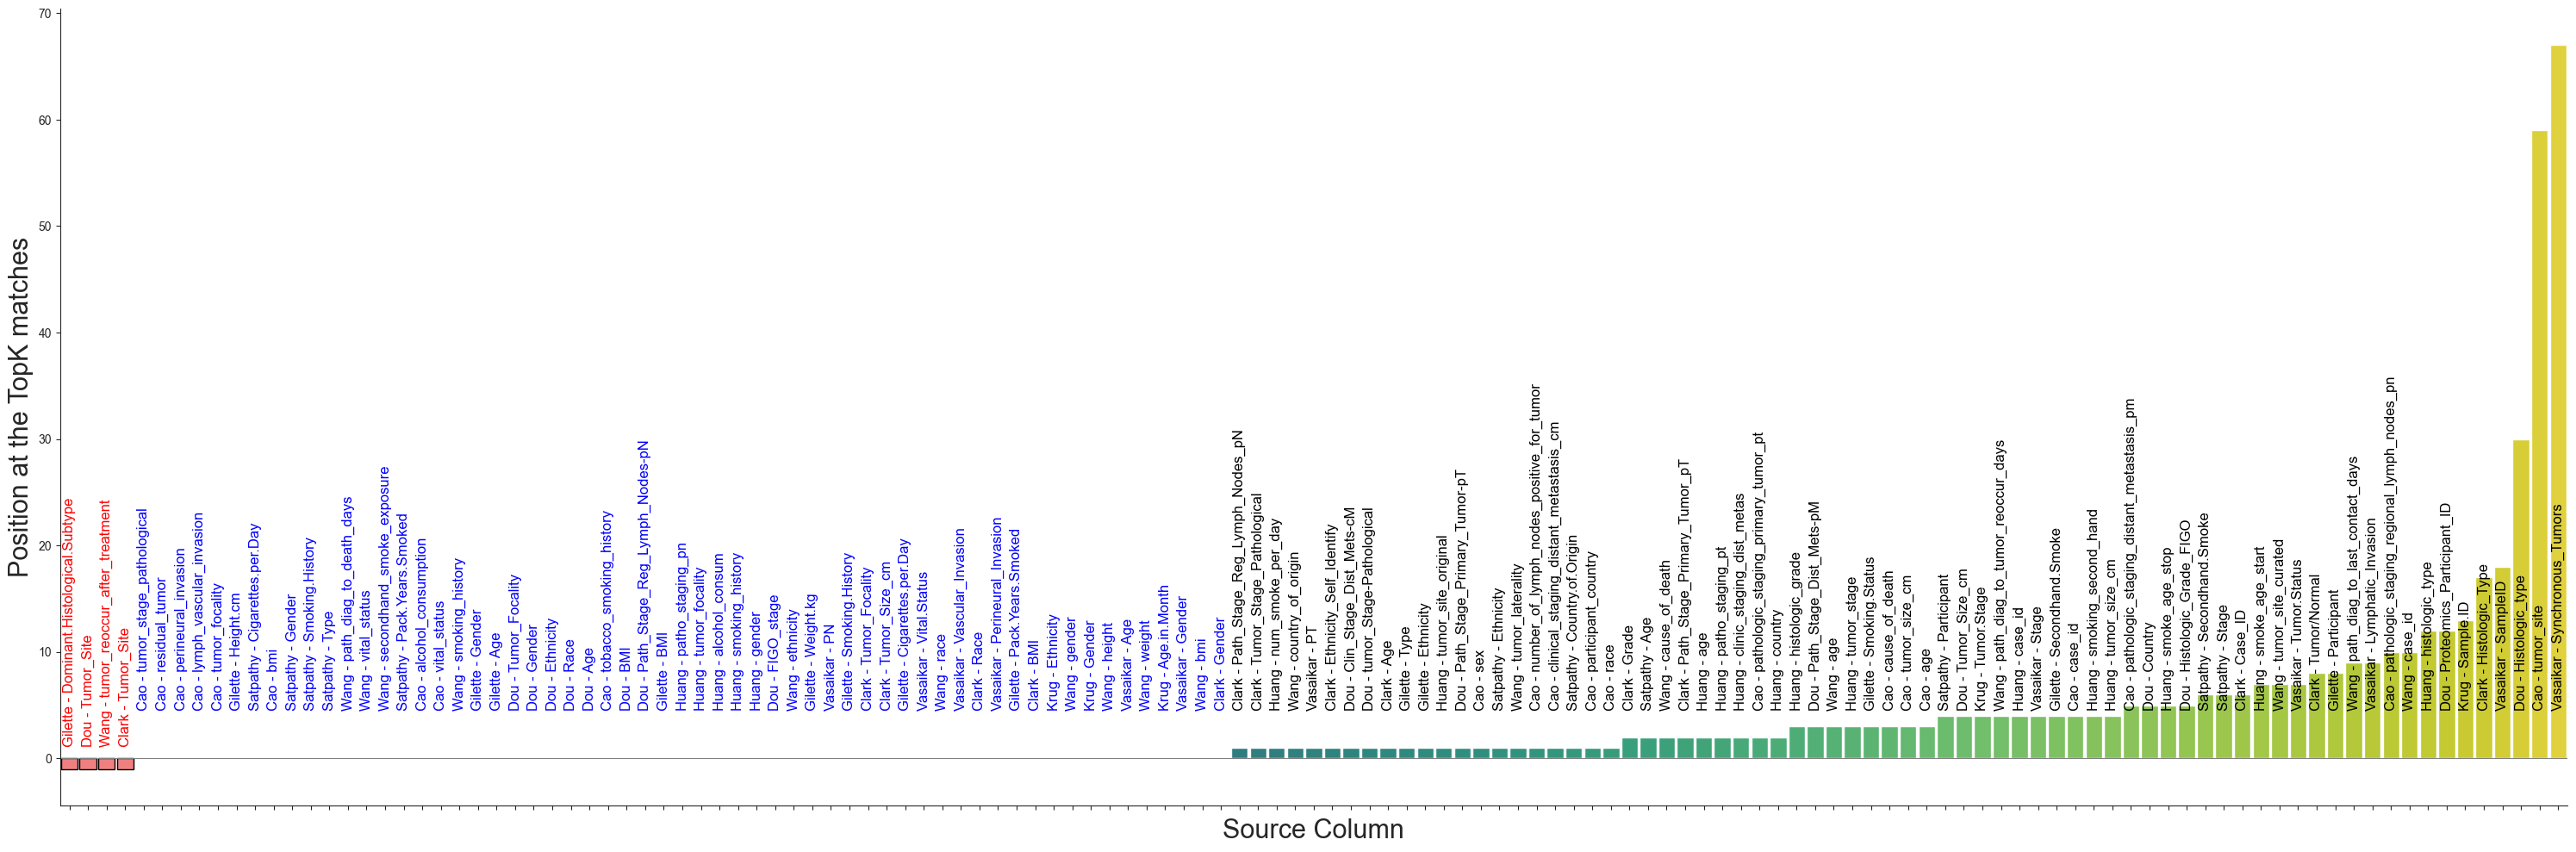

In [5]:
df = pd.read_csv(file_path)
method = 'ContrastiveLearning'
# method = 'FineTunedEmbedRetrieveAlign'
df = df[df['Matcher'] == method]

# df = df[df['Data Type'] == 'numeric']

df['Source File'] = df['Source File'].str.replace('.csv', '')
# Define the method

# Combine 'Source File' and 'Source Column' into a single column for the x-axis labels
df['Source'] = df['Source File'] + ' - ' + df['Source Column']
# Sort by 'Target Column Index'
df_sorted = df.sort_values('Target Column Index')
# Set the plot style
sns.set_style("ticks")
# Create the figure with an even wider size
plt.figure(figsize=(30, 10))  # Increased width from 20 to 24
# Create the bar plot with even wider bars
ax = sns.barplot(x='Source', y='Target Column Index', data=df_sorted, hue='Source', legend=False, palette='viridis', width=0.9)  # Increased width from 0.8 to 0.9
# Highlight bars where 'Target Column Index' is -1
for p, target_index, label in zip(ax.patches, df_sorted['Target Column Index'], df_sorted['Source']):
    if target_index == -1:
        # Add a light red background patch
        p.set_facecolor('lightcoral')
        p.set_edgecolor('black')
        p.set_linewidth(1)
        # Annotate with red text at the bottom
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., 0),
                    ha='center', va='bottom',
                    xytext=(0, 10),  # Increased y-offset from 10 to 20
                    textcoords='offset points',
                    rotation=90, fontsize=12, color='red')
    elif target_index == 0:
             # Annotate with black text at the bottom
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., 0),
                    ha='center', va='bottom',
                    xytext=(0, 40),  # Increased y-offset from 10 to 20
                    textcoords='offset points',
                    rotation=90, fontsize=12, color='blue')
    else:
        # Annotate with black text at the bottom
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., 0),
                    ha='center', va='bottom',
                    xytext=(0, 40),  # Increased y-offset from 10 to 20
                    textcoords='offset points',
                    rotation=90, fontsize=12, color='black')
        


# title = ''
# ax.set_title(f'{title}', loc='left', x=0.25, y=0.5)
# Rotate the x-axis labels for better readability
ax.set_xticklabels([])
# Add a horizontal line at y=0 for reference
ax.axhline(0, color='gray', linewidth=0.8)
# Remove default axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# ax.grid(False)
sns.despine()


# Add custom labels outside the figure
plt.xlabel('Source Column', fontsize=22 )
plt.ylabel('Position at the TopK matches', fontsize=22 )
# Adjust layout
plt.tight_layout()
plt.savefig('indexpos_distribution.pdf', dpi=300)
plt.show()
# Save the figure as a PDF with high resolution
